In [282]:
#Basic and most important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score , mean_squared_error

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [283]:
data = pd.read_excel("Dataset.xlsx")
data.columns=['Age', 'Education', 'Education Yrs', 'Marital Status', 'Employer',
       'Occupation', 'Relationship Status', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours per Week', 'Native Country', 'Salary']

In [284]:
data.head()

,Age,Education,Education Yrs,Marital Status,Employer,Occupation,Relationship Status,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Salary
0,39,Bachelors,13,Never-married,State-gov,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,77516
1,50,Bachelors,13,Married-civ-spouse,Self-emp-not-inc,Exec-managerial,Husband,Male,0,0,13,United-States,83311
2,38,HS-grad,9,Divorced,Private,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,215646
3,53,11th,7,Married-civ-spouse,Private,Handlers-cleaners,Husband,Male,0,0,40,United-States,234721
4,28,Bachelors,13,Married-civ-spouse,Private,Prof-specialty,Wife,Female,0,0,40,Cuba,338409


In [285]:
data.shape

(25999, 13)

In [286]:
data.isnull().sum()

Age                    0
Education              0
Education Yrs          0
Marital Status         0
Employer               0
Occupation             0
Relationship Status    0
Sex                    0
Capital Gain           0
Capital Loss           0
Hours per Week         0
Native Country         0
Salary                 0
dtype: int64

In [287]:
data['Salary'].unique()

array([ 77516,  83311, 215646, ...,  58213, 125684, 413760], dtype=int64)

<AxesSubplot:xlabel='Hours per Week'>

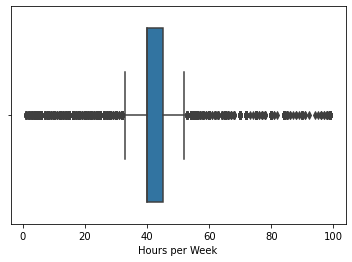

In [288]:
#removing outliers from hours_per_week
sns.boxplot(data['Hours per Week'])

In [289]:
def remove_outlier_hours_per_week(data):
    IQR = data['Hours per Week'].quantile(0.75) - data['Hours per Week'].quantile(0.25)
    lower_range = data['Hours per Week'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Hours per Week'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Hours per Week'] <= lower_range, 'Hours per Week'] = lower_range
    data.loc[data['Hours per Week'] >= upper_range, 'Hours per Week'] = upper_range

In [290]:
remove_outlier_hours_per_week(data)

<AxesSubplot:xlabel='Hours per Week'>

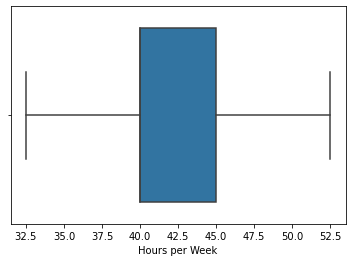

In [291]:
sns.boxplot(data['Hours per Week'])

<AxesSubplot:xlabel='Education Yrs'>

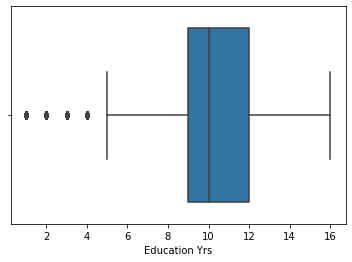

In [292]:
sns.boxplot(data['Education Yrs'])

In [293]:
def remove_outlier_education_yrs(data):
    IQR = data['Education Yrs'].quantile(0.75) - data['Education Yrs'].quantile(0.25)
    lower_range = data['Education Yrs'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Education Yrs'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Education Yrs'] <= lower_range, 'Education Yrs'] = lower_range
    data.loc[data['Education Yrs'] >= upper_range, 'Education Yrs'] = upper_range

In [294]:
remove_outlier_education_yrs(data)

<AxesSubplot:xlabel='Education Yrs'>

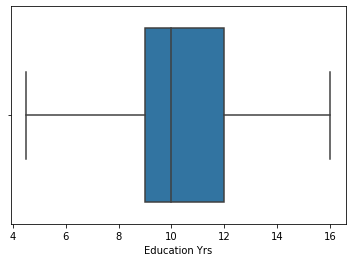

In [295]:
sns.boxplot(data['Education Yrs'])

<AxesSubplot:xlabel='Age'>

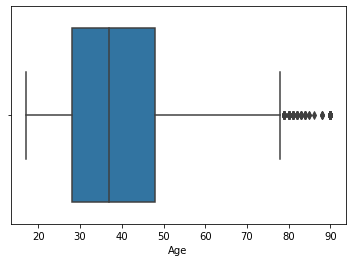

In [296]:
sns.boxplot(data['Age'])

In [297]:
def remove_outlier_age(data):
    IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
    lower_range = data['Age'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Age'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Age'] <= lower_range, 'Age'] = lower_range
    data.loc[data['Age'] >= upper_range, 'Age'] = upper_range

In [298]:
remove_outlier_age(data)

<AxesSubplot:xlabel='Age'>

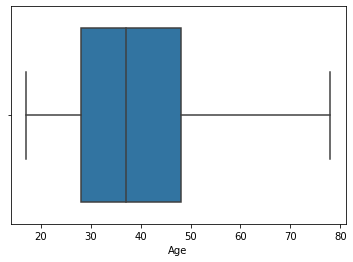

In [299]:
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='Capital Gain'>

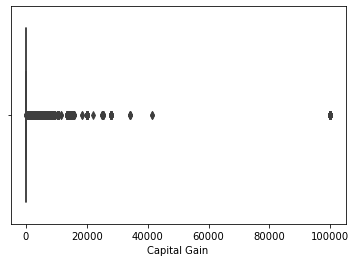

In [300]:
sns.boxplot(data['Capital Gain'])

In [301]:
def remove_outlier_Capital_Gain(data):
    IQR = data['Capital Gain'].quantile(0.75) - data['Capital Gain'].quantile(0.25)
    lower_range = data['Capital Gain'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Capital Gain'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Capital Gain'] <= lower_range, 'Capital Gain'] = lower_range
    data.loc[data['Capital Gain'] >= upper_range, 'Capital Gain'] = upper_range

In [302]:
remove_outlier_Capital_Gain(data)

<AxesSubplot:xlabel='Capital Gain'>

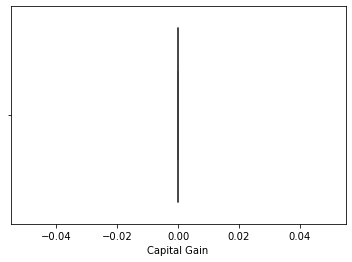

In [303]:
sns.boxplot(data['Capital Gain'])

<AxesSubplot:xlabel='Capital Loss'>

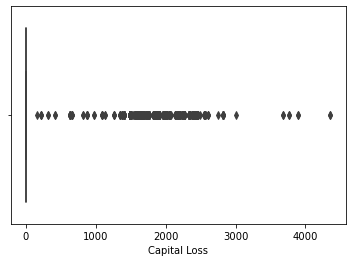

In [304]:
sns.boxplot(data['Capital Loss'])

In [305]:
def remove_outlier_Capital_Loss(data):
    IQR = data['Capital Loss'].quantile(0.75) - data['Capital Loss'].quantile(0.25)
    lower_range = data['Capital Loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Capital Loss'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Capital Loss'] <= lower_range, 'Capital Loss'] = lower_range
    data.loc[data['Capital Loss'] >= upper_range, 'Capital Loss'] = upper_range

In [306]:
remove_outlier_Capital_Loss(data)

<AxesSubplot:xlabel='Capital Loss'>

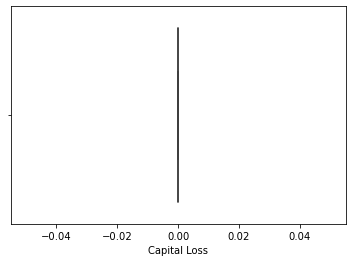

In [307]:
sns.boxplot(data['Capital Loss'])

<AxesSubplot:xlabel='Salary'>

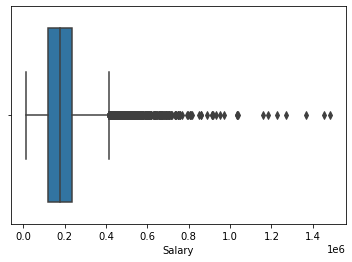

In [308]:
sns.boxplot(data['Salary'])

In [309]:
def remove_outlier_Salary(data):
    IQR = data['Salary'].quantile(0.75) - data['Salary'].quantile(0.25)
    lower_range = data['Salary'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Salary'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Salary'] <= lower_range, 'Salary'] = lower_range
    data.loc[data['Salary'] >= upper_range, 'Salary'] = upper_range

In [310]:
remove_outlier_Salary(data)

<AxesSubplot:xlabel='Salary'>

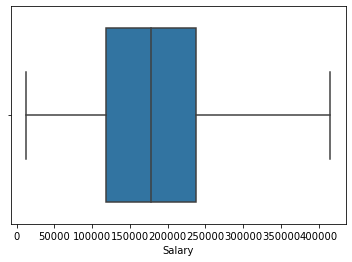

In [311]:
sns.boxplot(data['Salary'])

<AxesSubplot:>

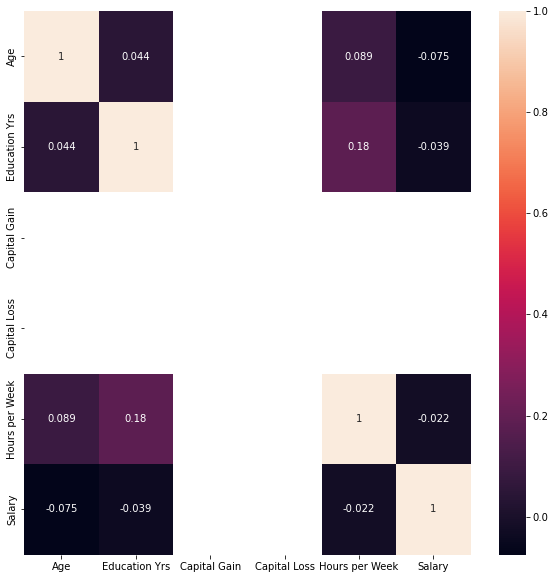

In [312]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr,annot=True)

In [313]:
data.drop('Relationship Status',axis=1,inplace=True)
data.drop('Age',axis=1,inplace=True)
data.drop('Sex',axis=1,inplace=True)
data.drop('Capital Loss',axis=1,inplace=True)
data.drop('Capital Gain',axis=1,inplace=True)

In [314]:
#feature enginnering
def feature_engineering(data):
    
    #convert sex column into 0 and 1 , if male then 1 else 0
#     data['Sex'] = np.where(data['Sex'] == " Male", 1, 0)
    
    #Salary
#     data['Salary'].mask(np.int(data['Salary']) < 100000, '<1L', inplace=True)
#     data['Salary'].mask(data['Salary'].astype(int64) > 100000 and data['Salary'] < 100000 , '1L-2L', inplace=True)
#     data['Salary'].mask(data['Salary'].astype(int64) > 200000 and data['Salary'] < 300000 , '2L-3L', inplace=True)
#     data['Salary'].mask(data['Salary'].astype(int64) > 300000 and data['Salary'] < 400000 , '3L-4L', inplace=True)
#     data['Salary'].mask(data['Salary'].astype(int64) > 400000 , '>4L', inplace=True)
    
    #occupation
    data['Occupation'] = np.where(data['Occupation'] == ' ?','Missing',data['Occupation'])
    label_enco_occu = {value: key for key, value in enumerate(data['Occupation'].unique())}
    data['Occupation'] = data['Occupation'].map(label_enco_occu)
    
    label_enco_marital_status = {value: key for key, value in enumerate(data['Marital Status'].unique())}
    data['Marital Status'] = data['Marital Status'].map(label_enco_marital_status)
    
    
    label_enco_edu = {value: key for key, value in enumerate(data['Education'].unique())}
    data['Education'] = data['Education'].map(label_enco_edu)
    
    #Employer
    data['Employer'] = np.where(data['Employer'] == ' ?','Missing',data['Employer'])
    label_enco_employee = {value: key for key, value in enumerate(data['Employer'].unique())}
    data['Employer'] = data['Employer'].map(label_enco_employee)
    
    #Native Country
    data['Native Country'] = np.where(data['Native Country'] == ' ?','Missing',data['Native Country'])
    label_enco_country = {value: key for key, value in enumerate(data['Native Country'].unique())}
    data['Native Country'] = data['Native Country'].map(label_enco_country)
    
    #Relationship Status
#     label_enco_edu = {value: key for key, value in enumerate(data['Relationship Status'].unique())}
#     data['Relationship Status'] = data['Relationship Status'].map(label_enco_edu)
    return data

In [315]:
data = feature_engineering(data)

In [316]:
data.head()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Native Country,Salary
0,0,13.0,0,0,0,40.0,0,77516
1,0,13.0,1,1,1,32.5,0,83311
2,1,9.0,2,2,2,40.0,0,215646
3,2,7.0,1,2,2,40.0,0,234721
4,0,13.0,1,2,3,40.0,1,338409


In [317]:
#Scaling

In [318]:
for i in range(25999):
    if data.at[i,'Salary'] < 200000:
        data.at[i,'Salary'] = '<2L'
    else:
        data.at[i,'Salary'] = '>2L'
        

In [319]:
data['Salary']

0        <2L
1        <2L
2        >2L
3        >2L
4        >2L
        ... 
25994    >2L
25995    <2L
25996    <2L
25997    >2L
25998    >2L
Name: Salary, Length: 25999, dtype: object

In [320]:
data.head()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Native Country,Salary
0,0,13.0,0,0,0,40.0,0,<2L
1,0,13.0,1,1,1,32.5,0,<2L
2,1,9.0,2,2,2,40.0,0,>2L
3,2,7.0,1,2,2,40.0,0,>2L
4,0,13.0,1,2,3,40.0,1,>2L


In [321]:
#Scaliing
from sklearn.preprocessing import StandardScaler

In [322]:
sc = StandardScaler()

In [323]:
X = data[[ 'Education', 'Education Yrs', 'Marital Status', 'Employer',
       'Occupation', 'Hours per Week', 'Native Country']]

In [324]:
y = data['Salary']

In [325]:
y.value_counts()

<2L    16138
>2L     9861
Name: Salary, dtype: int64

In [326]:
X = sc.fit_transform(X)

In [327]:
#train test split

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [330]:
print("Train data shape : {}".format(X_train.shape))
print("Test data shape : {}".format(X_test.shape))

Train data shape : (20799, 7)
Test data shape : (5200, 7)


In [331]:
from sklearn.linear_model import LogisticRegression

In [332]:
model1  = AdaBoostClassifier(n_estimators = 120,random_state=0)

In [333]:
model1.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=120, random_state=0)

In [334]:
y_pred = model1.predict(X_test)

In [335]:
result = {
    'Actual': y_test,
    'Predicted': y_pred
}

In [336]:
pd.DataFrame(result)

,Actual,Predicted
4148,<2L,<2L
7840,<2L,<2L
18897,<2L,<2L
4194,<2L,<2L
12319,>2L,<2L
...,...,...
20591,>2L,<2L
25739,<2L,<2L
25584,<2L,<2L
4217,>2L,<2L


In [337]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [338]:
print("Accuracy Score : {}".format(accuracy_score(y_test,y_pred)),"\n")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test,y_pred)),"\n")
print("Classification Report:\n {}".format(classification_report(y_test,y_pred)),"\n")


Accuracy Score : 0.6440384615384616 

Confusion Matrix:
 [[3234   40]
 [1811  115]] 

Classification Report:
               precision    recall  f1-score   support

         <2L       0.64      0.99      0.78      3274
         >2L       0.74      0.06      0.11      1926

    accuracy                           0.64      5200
   macro avg       0.69      0.52      0.44      5200
weighted avg       0.68      0.64      0.53      5200
 



In [339]:
import pickle 
#open a file, where you want to store the data
file =open('model1.pkl','wb')

#dump information to that file 
pickle.dump(lg_model, file)